# Sales Data Analysis
Analyzing Superstore sales data to identify trends and performance.

1. Import Libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

2. Load and Inspect Data 

In [3]:
vc = pd.read_csv(r'C:\Users\victo\OneDrive\Documents\data analysis resources\superstore dataset\Sample - Superstore.csv', encoding='latin1')
print(vc)
print(vc.info())

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

Data cleaning and processing

In [4]:
# Convert 'Order Date' to datetime
vc['Order Date'] = pd.to_datetime(vc['Order Date'])

# Handle missing values (optional, show how many)
print("Missing values per column:\n", vc.isnull().sum())

# Remove duplicates
vc = vc.drop_duplicates()

Missing values per column:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


5. Visualizations

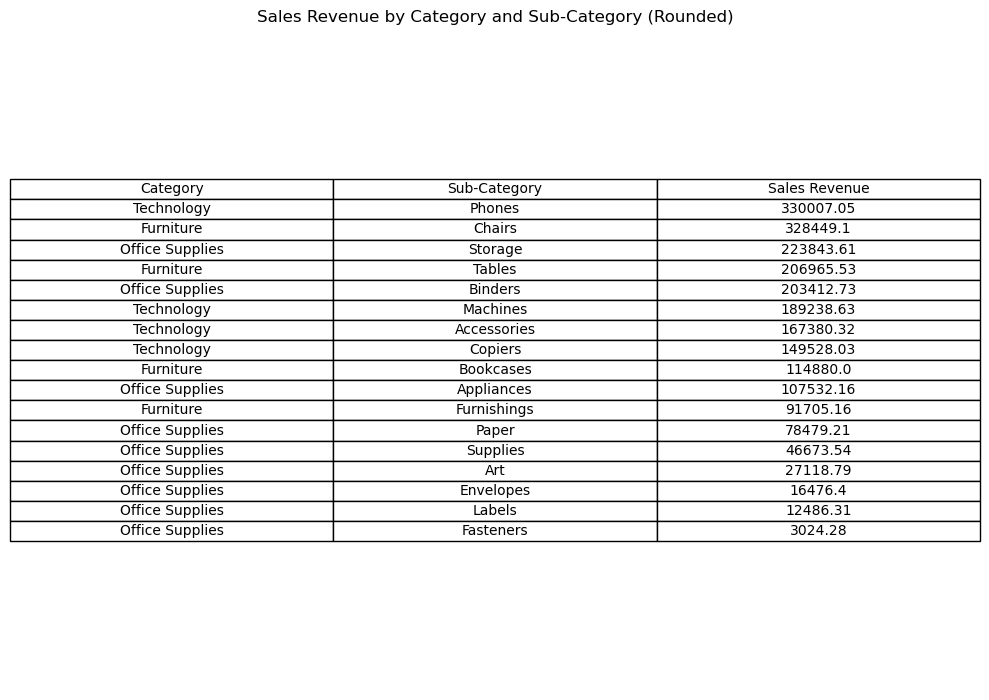

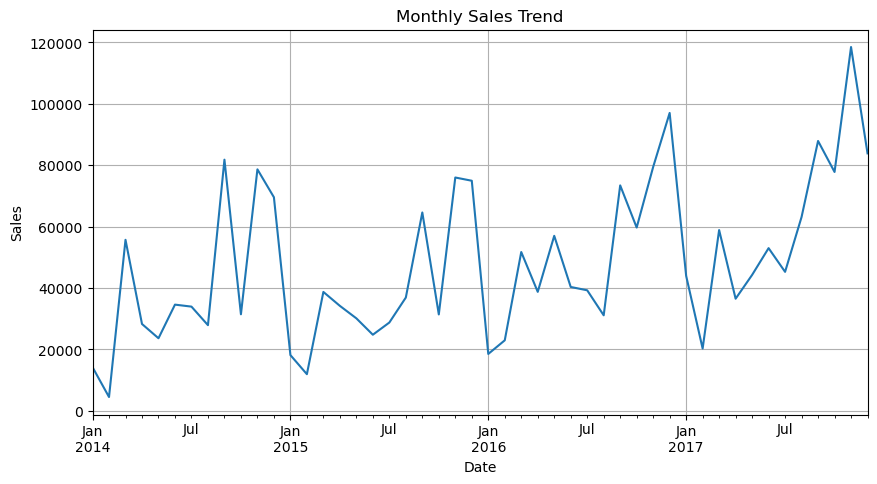

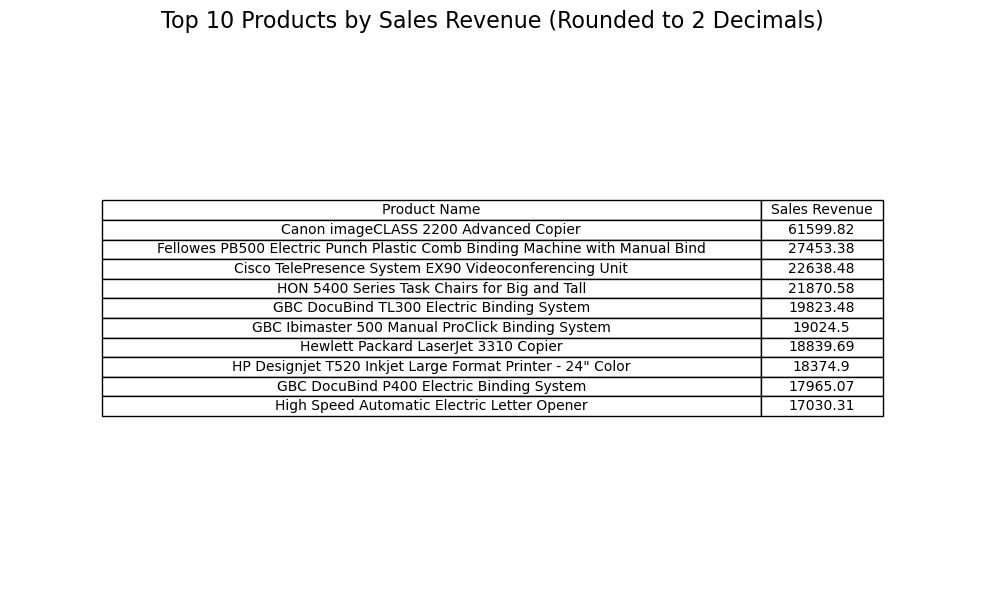

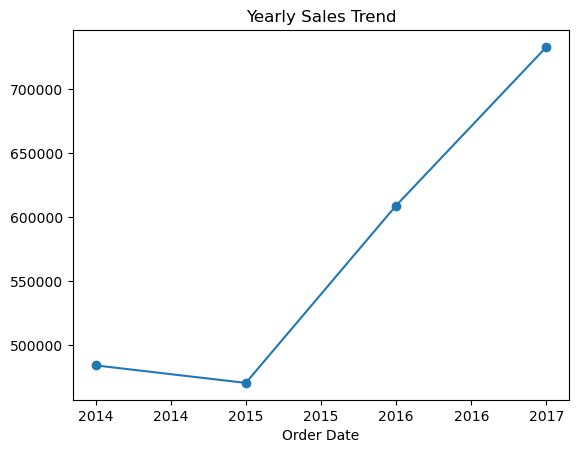

In [9]:
# 1. Total sales by category and sub-category
# Group and sum sales, then round to 2 decimals
category_sales = vc.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)
category_sales_rounded = category_sales.round(2)

# Prepare table data (convert MultiIndex to flat list)
table_data = [(cat, subcat, sales) for (cat, subcat), sales in category_sales_rounded.items()]

plt.figure(figsize=(10, len(table_data) * 0.3 + 2))  # Adjust height based on number of rows
plt.title('Sales Revenue by Category and Sub-Category (Rounded)')

# Create table with 3 columns
plt.table(cellText=table_data,
          colLabels=['Category', 'Sub-Category', 'Sales Revenue'],
          cellLoc='center',
          loc='center')

plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trend
monthly_sales = vc.groupby(vc['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.plot(figsize=(10, 5), title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

# 3. Top 10 Products by Sales
# Sum sales revenue and round to 2 decimal places
plt.figure(figsize=(10, 6))  # Bigger figure for better clarity
plt.title('Top 10 Products by Sales Revenue (Rounded to 2 Decimals)', fontsize=16)

# Prepare table data
table_data = list(zip(top_products_rounded.index, top_products_rounded.values))

# Create the table with larger font size
table = plt.table(cellText=table_data,
                  colLabels=['Product Name', 'Sales Revenue'],
                  cellLoc='center',
                  loc='center')

table.auto_set_font_size(False)   # Disable automatic font sizing
table.set_fontsize(10)            # Set font size manually

# Optionally, set column widths for better layout
table.auto_set_column_width([0, 1])

plt.axis('off')
plt.tight_layout()
plt.show()

#4. Yearly sales trend
plt.figure()
yearly_sales = vc.groupby(vc['Order Date'].dt.year)['Sales'].sum()

ax = yearly_sales.plot(kind='line', marker='o', title='Yearly Sales Trend')

# Format x-axis ticks as integers (remove decimals)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

plt.show()